#Developing an MVP Launch Strategy for a Flying Taxi Service

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Reading Data

In [ ]:
import pandas as pd

In [ ]:
taxi_rides_df = pd.read_csv('/content/drive/MyDrive/DataProductManagerUdacityData/MidtermProject/taxi_rides.csv')

## How many records are in the dataset?

Rows and columns in dataframe shape:

In [ ]:
taxi_rides_df.shape

(1048468, 15)

Total number of data points:

In [ ]:
taxi_rides_df.shape[0]*taxi_rides_df.shape[1]

15727020

## What does each record represent?

In [ ]:
taxi_rides_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,duration,distance,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,id3487442,2,2/29/16 18:39,2/29/16 18:42,1,-73.981819,40.768963,-73.981819,40.768963,N,227,0.0,NaN,NaN,NaN
1,id1145809,2,5/16/16 23:15,5/16/16 23:31,6,-73.808487,40.687336,-73.808487,40.687336,N,947,0.0,NaN,NaN,NaN
2,id3499387,1,1/25/16 19:45,1/25/16 19:54,1,-73.786720,40.647041,-73.786720,40.647041,N,580,0.0,NaN,NaN,NaN
3,id0753277,1,1/27/16 22:29,1/27/16 22:29,1,-74.209854,40.816853,-74.209854,40.816853,N,27,0.0,NaN,NaN,NaN
4,id2134482,1,1/22/16 16:13,1/22/16 16:13,1,-73.776314,40.645454,-73.776314,40.645454,N,19,0.0,NaN,NaN,NaN


In [ ]:
taxi_rides_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048468 entries, 0 to 1048467
Data columns (total 15 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1048468 non-null  object 
 1   vendor_id           1048468 non-null  int64  
 2   pickup_datetime     1048468 non-null  object 
 3   dropoff_datetime    1048468 non-null  object 
 4   passenger_count     1048468 non-null  int64  
 5   pickup_longitude    1048468 non-null  float64
 6   pickup_latitude     1048468 non-null  float64
 7   dropoff_longitude   1048468 non-null  float64
 8   dropoff_latitude    1048468 non-null  float64
 9   store_and_fwd_flag  1048468 non-null  object 
 10  duration            1048468 non-null  int64  
 11  distance            1048468 non-null  float64
 12  Unnamed: 12         0 non-null        float64
 13  Unnamed: 13         0 non-null        float64
 14  Unnamed: 14         0 non-null        float64
dtypes: float64(8), 

In [ ]:
taxi_rides_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'duration', 'distance', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'],
      dtype='object')

## What is the primary key?

I would say, intuitively, the "id" key is primary key, let us check it out.

In [ ]:
taxi_rides_df.shape[0] == len(taxi_rides_df.id.unique())

True

Indeed, each "id" describes a unique record.

## What date range is your dataset bound to?

In [ ]:
taxi_rides_df[['pickup_datetime', 'dropoff_datetime']].max().max()

'7/1/16 7:46'

In [ ]:
taxi_rides_df[['pickup_datetime', 'dropoff_datetime']].min().min()

'1/1/16 0:00'

## Geographical Bounds

What are the geographical bounds of this dataset? Is it limited to Manhattan, or is Brooklyn, Queens, Staten Island, the Bronx, and New Jersey included? Where are most of the data points centralized at? Are there outliers?


In [ ]:
taxi_rides_df[['pickup_latitude', 'dropoff_latitude']].max()

pickup_latitude     51.881084
dropoff_latitude    43.911762
dtype: float64

In [ ]:
taxi_rides_df[['pickup_latitude', 'dropoff_latitude']].min()

pickup_latitude     34.359695
dropoff_latitude    32.181141
dtype: float64

In [ ]:
taxi_rides_df[['pickup_longitude', 'dropoff_longitude']].max()

pickup_longitude    -61.335529
dropoff_longitude   -61.335529
dtype: float64

In [ ]:
taxi_rides_df[['pickup_longitude', 'dropoff_longitude']].min()

pickup_longitude    -78.547401
dropoff_longitude   -79.817978
dtype: float64

**New Jersey, USA (State)**

Latitude and longitude coordinates are: 39.833851, -74.871826

**New York, USA (State)**

Latitude and longitude coordinates are: 43.000000, -75.000000

The latitude of **New York City, NY, USA** is 40.730610, and the longitude is -73.935242. New York City, NY

### Going deeper with plots

In [ ]:
import matplotlib.pyplot as plt


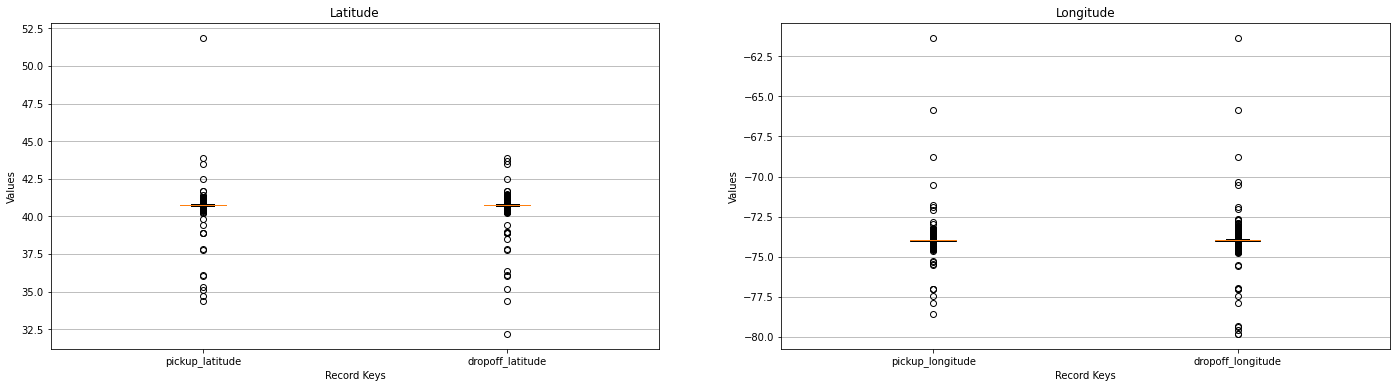

In [ ]:
all_data1 = taxi_rides_df[['pickup_latitude', 'dropoff_latitude']]
labels1 = ['pickup_latitude', 'dropoff_latitude']

all_data2 = taxi_rides_df[['pickup_longitude', 'dropoff_longitude']]
labels2 = ['pickup_longitude', 'dropoff_longitude']


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# rectangular box plot
bplot1 = ax1.boxplot(all_data1.transpose(),
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels1)  # will be used to label x-ticks
ax1.set_title('Latitude')

# notch shape box plot
bplot2 = ax2.boxplot(all_data2.transpose(),
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels2)  # will be used to label x-ticks
ax2.set_title('Longitude')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen', 'blue']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Record Keys')
    ax.set_ylabel('Values')

plt.show()

In [ ]:
taxi_rides_df[['pickup_latitude', 'dropoff_latitude', 'pickup_longitude', 'dropoff_latitude']].describe()

,pickup_latitude,dropoff_latitude,pickup_longitude,dropoff_latitude
count,1.048468e+06,1.048468e+06,1.048468e+06,1.048468e+06
mean,4.075094e+01,4.075183e+01,-7.397343e+01,4.075183e+01
std,3.372348e-02,3.636651e-02,4.268783e-02,3.636651e-02
min,3.435970e+01,3.218114e+01,-7.854740e+01,3.218114e+01
25%,4.073738e+01,4.073594e+01,-7.399186e+01,4.073594e+01
50%,4.075415e+01,4.075455e+01,-7.398174e+01,4.075455e+01
75%,4.076836e+01,4.076984e+01,-7.396731e+01,4.076984e+01
max,5.188108e+01,4.391176e+01,-6.133553e+01,4.391176e+01


Clearly, the pickup and dropoff locations are not limited to Manhattan, Brooklyn, Queens, Staten Island, the Bronx or New Jersey. In fact, there are outliers, that's for sure. These data points are centralized somewhere close to New York City, as we can see on the 75% percentile above.

## Data Enrichment

### Price

In [ ]:
taxi_rides_df[['duration', 'distance', 'passenger_count']].mean()

duration           962.195626
distance             3.442279
passenger_count      1.664377
dtype: float64

In [ ]:
taxi_rides_df[['pickup_datetime', 'dropoff_datetime', 'duration']].head()

,pickup_datetime,dropoff_datetime,duration
0,2/29/16 18:39,2/29/16 18:42,227
1,5/16/16 23:15,5/16/16 23:31,947
2,1/25/16 19:45,1/25/16 19:54,580
3,1/27/16 22:29,1/27/16 22:29,27
4,1/22/16 16:13,1/22/16 16:13,19


Taking a look at the values from keys 'pickup_datetime', 'dropoff_datetime' and 'duration', **we can assume 'duration' is measured in seconds.**


In [ ]:
# Python 3 program to calculate Distance Between Two Points on Earth
from math import radians, cos, sin, asin, sqrt
def distance(lat1, lat2, lon1, lon2):
      
    # The math module contains a function named
    # radians which converts from degrees to radians.
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
       
    # Haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  
    c = 2 * asin(sqrt(a)) 
     
    # Radius of earth in kilometers. Use 3956 for miles
    r = 6371
       
    # calculate the result
    return(c * r)

In [ ]:
 taxi_rides_df['projected_distance_km'] = taxi_rides_df.apply(lambda row : distance(row['pickup_latitude'],row['dropoff_latitude'], row['pickup_longitude'], row['dropoff_longitude']), axis = 1)

In [ ]:
taxi_rides_df[['distance', 'projected_distance_km']].sort_values(by='distance',ascending=False).head()

,distance,projected_distance_km
1048467,1240.908677,1240.908676
1048466,891.214103,891.214104
1048465,578.842818,578.842817
1048464,562.235188,562.235189
1048463,545.853499,545.853499


As we can see, we can safely assume 'distance' is measured in kilometers.

Taking a look at [Trip Advisor](https://www.tripadvisor.com/Travel-g60763-s304/New-York-City:New-York:Taxis.And.Rental.Cars.html), we can see that taxis in NY, where most of our taxi rides take place, do not charge per passenger, criteria are solely based on distance and duration, so we're going to consider only these 2 keys. Price references were took here: [link](https://www.taxi-calculator.com/taxi-fare-new-york-city/259)

The basic fee varies according to the day of the week, considering USD 2.5 for week days and USD 3.00 for weekend days, let us assume the average basic fee equals:

In [ ]:
average_basic_fee = (2*3+5*2.5)/7
average_basic_fee

2.642857142857143

A hour of waiting time equals USD 30.00, so computing the value per second:

In [ ]:
fee_per_second = 30/3600
fee_per_second

0.008333333333333333

In [ ]:
def taxi_price(duration_seconds, distance_km):
  average_basic_fee = 2.642
  fee_per_km = 1.56
  fee_per_s = 0.00834
  return (average_basic_fee + fee_per_km*distance_km + fee_per_s*duration_seconds)

In [ ]:
 taxi_rides_df['price'] = taxi_rides_df.apply(lambda row : taxi_price(row['duration'], row['distance']), axis = 1)

In [ ]:
taxi_rides_df[['duration', 'distance', 'price']].sort_values(by='price',ascending=False).head()

,duration,distance,price
1030640,3526282,19.900661,29442.878912
397634,2227612,1.635128,18583.476879
900870,2049578,5.982487,17105.455200
1032504,1939736,20.148664,16211.472156
1048467,792,1240.908677,1945.064816


### Distance-to-duration Ratio

In [ ]:
def division(x, y):
  if y != 0:
    return x/y
  elif y == 0:
    return 0

In [ ]:
taxi_rides_df['distance_to_duration_ratio'] = taxi_rides_df.apply(lambda row : division(row['distance'], row['duration']), axis = 1)
taxi_rides_df['distance_to_duration_ratio'].sort_values(ascending=False)

1048465    1.910372
1048467    1.566804
1048466    1.458616
1048461    1.135198
1048462    0.487933
             ...   
2379       0.000000
2378       0.000000
2377       0.000000
2376       0.000000
0          0.000000
Name: distance_to_duration_ratio, Length: 1048468, dtype: float64

### Duration-to-distance Ratio

In [ ]:
taxi_rides_df['duration_to_distance_ratio'] = taxi_rides_df.apply(lambda row : division(row['duration'], row['distance']), axis = 1)
taxi_rides_df['duration_to_distance_ratio'].sort_values(ascending=False)

3649    9.099262e+08
4415    1.340647e+08
4702    7.620260e+07
4752    6.502126e+07
4867    6.018890e+07
            ...     
2379    0.000000e+00
2378    0.000000e+00
2377    0.000000e+00
2376    0.000000e+00
0       0.000000e+00
Name: duration_to_distance_ratio, Length: 1048468, dtype: float64

## Scope and Distribution

In [1]:
import pandas as pd

In [4]:
taxi_rides_df = pd.read_csv('/content/drive/MyDrive/DataProductManagerUdacityData/MidtermProject/taxi_rides_output.csv')

In [28]:
taxi_rides_df.columns

Index(['Unnamed: 0', 'id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'duration', 'distance', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'projected_distance_km', 'price', 'distance_to_duration_ratio',
       'duration_to_distance_ratio', 'pickup_datetime_dt'],
      dtype='object')

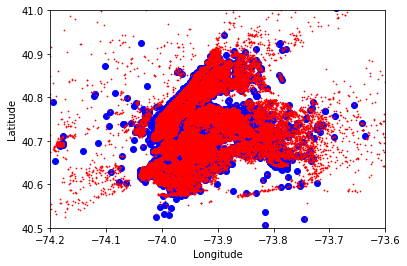

In [13]:
import matplotlib.pyplot as plt

plt.scatter(x=taxi_rides_df['pickup_longitude'], y=taxi_rides_df['pickup_latitude'], c = 'b')
plt.scatter(x=taxi_rides_df['dropoff_longitude'], y=taxi_rides_df['dropoff_latitude'], c = 'r', s=0.5)

plt.xlim(-74.2, -73.6)
plt.ylim(40.5,41)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Eliminating outliers

In [5]:
mask = ((taxi_rides_df.distance > 0.1)&(taxi_rides_df.distance<200)&(taxi_rides_df.duration>59)&(taxi_rides_df.duration<86400))

In [15]:
mask = mask & (taxi_rides_df.pickup_longitude > -74.2) & (taxi_rides_df.pickup_longitude < -73.6) & (taxi_rides_df.pickup_latitude > 40.5) & (taxi_rides_df.pickup_latitude < 41)

In [16]:
mask = mask & (taxi_rides_df.dropoff_longitude > -74.2) & (taxi_rides_df.dropoff_longitude < -73.6) & (taxi_rides_df.dropoff_latitude > 40.5) & (taxi_rides_df.dropoff_latitude < 41)

In [17]:
taxi_rides_df = taxi_rides_df[mask]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [18]:
taxi_rides_df[['duration', 'distance', 'passenger_count', 'duration_to_distance_ratio', 'price']].mean()

duration                      957.902542
distance                        3.461676
passenger_count                 1.665531
duration_to_distance_ratio    400.610963
price                          16.031123
dtype: float64

In [19]:
taxi_rides_df[['duration', 'distance', 'passenger_count', 'duration_to_distance_ratio', 'price']].median()

duration                      666.000000
distance                        2.117855
passenger_count                 1.000000
duration_to_distance_ratio    280.282427
price                          11.724261
dtype: float64

In [20]:
taxi_rides_df[['duration', 'distance', 'passenger_count', 'duration_to_distance_ratio', 'price']].std()

duration                      3179.655994
distance                         3.889264
passenger_count                  1.314901
duration_to_distance_ratio    2746.224469
price                           28.157156
dtype: float64

In [21]:
2 * taxi_rides_df[['duration', 'distance', 'passenger_count', 'duration_to_distance_ratio', 'price']].std()

duration                      6359.311989
distance                         7.778527
passenger_count                  2.629803
duration_to_distance_ratio    5492.448937
price                           56.314313
dtype: float64

In [22]:
taxi_rides_df[['duration', 'distance', 'passenger_count', 'duration_to_distance_ratio', 'price']].mean() + taxi_rides_df[['duration', 'distance', 'passenger_count', 'duration_to_distance_ratio', 'price']].std()

duration                      4137.558537
distance                         7.350940
passenger_count                  2.980432
duration_to_distance_ratio    3146.835432
price                           44.188279
dtype: float64

In [23]:
taxi_rides_df[['duration', 'distance', 'passenger_count', 'duration_to_distance_ratio', 'price']].mean() + 2 * taxi_rides_df[['duration', 'distance', 'passenger_count', 'duration_to_distance_ratio', 'price']].std()

duration                      7317.214531
distance                        11.240204
passenger_count                  4.295334
duration_to_distance_ratio    5893.059900
price                           72.345435
dtype: float64

In [24]:
4139.54/60

68.99233333333333

In [25]:
7320.27/60

122.00450000000001

In [26]:
taxi_rides_df[['duration', 'distance', 'passenger_count', 'duration_to_distance_ratio', 'price']].describe()

,duration,distance,passenger_count,duration_to_distance_ratio,price
count,1.036502e+06,1.036502e+06,1.036502e+06,1.036502e+06,1.036502e+06
mean,9.579025e+02,3.461676e+00,1.665531e+00,4.006110e+02,1.603112e+01
std,3.179656e+03,3.889264e+00,1.314901e+00,2.746224e+03,2.815716e+01
min,6.000000e+01,1.000080e-01,0.000000e+00,6.167189e+00,3.317616e+00
25%,4.020000e+02,1.256062e+00,1.000000e+00,2.013575e+02,8.201860e+00
50%,6.660000e+02,2.117855e+00,1.000000e+00,2.802824e+02,1.172426e+01
75%,1.079000e+03,3.908277e+00,2.000000e+00,3.907190e+02,1.784336e+01
max,8.639100e+04,4.776513e+01,8.000000e+00,8.332166e+05,7.560984e+02


In [27]:
len(taxi_rides_df[taxi_rides_df.duration < 300])/len(taxi_rides_df)

0.14522306758694145

## Flying Car or Mini-copter

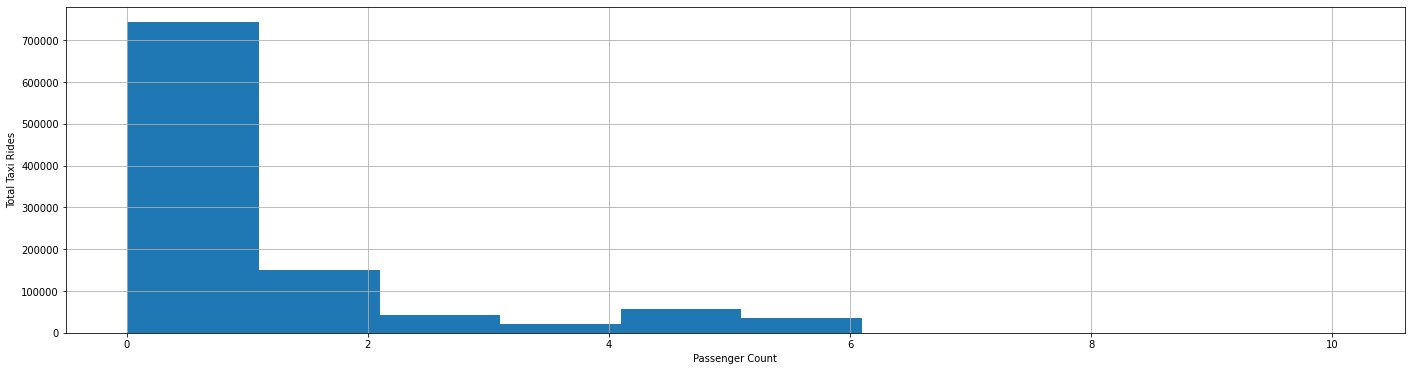

In [ ]:
taxi_rides_df['passenger_count'].hist(bins=[0, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1, 7.1, 8.1, 9.1, 10.1], figsize=(24, 6))
plt.xlabel('Passenger Count')
plt.ylabel('Total Taxi Rides')
plt.show()

In [ ]:
len(taxi_rides_df[taxi_rides_df['passenger_count']<1.1])

743095

In [ ]:
len(taxi_rides_df[taxi_rides_df['passenger_count']<1.1]) / len(taxi_rides_df)

0.7087436144927647

In [ ]:
len(taxi_rides_df[taxi_rides_df['passenger_count']<2.1]) - len(taxi_rides_df[taxi_rides_df['passenger_count']<1.1])

151060

In [ ]:
len(taxi_rides_df[taxi_rides_df['passenger_count']<3.1]) - len(taxi_rides_df[taxi_rides_df['passenger_count']<2.1])

43033

In [ ]:
len(taxi_rides_df[taxi_rides_df['passenger_count']<4.1]) - len(taxi_rides_df[taxi_rides_df['passenger_count']<3.1])

20334

In [ ]:
taxi_rides_df['passenger_count'].max()

9

In [ ]:
len(taxi_rides_df[taxi_rides_df['passenger_count']<=1.1])

743095

In [ ]:
total_market_1_passenger = taxi_rides_df[taxi_rides_df['passenger_count']<=1.1].price.sum()
total_market_1_passenger

11673543.866153438

In [ ]:
total_market_global = taxi_rides_df.price.sum()
total_market_global

16813931.771709155

In [ ]:
total_market_1_passenger/total_market_global

0.6942780561174365

## Placing pick-up / drop-off nodes Strategically

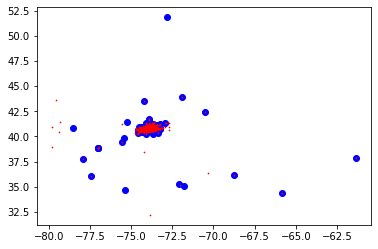

In [ ]:
plt.scatter(x=taxi_rides_df['pickup_longitude'], y=taxi_rides_df['pickup_latitude'], c = 'b')
plt.scatter(x=taxi_rides_df['dropoff_longitude'], y=taxi_rides_df['dropoff_latitude'], c = 'r', s=0.5)
plt.show()

Zooming in...

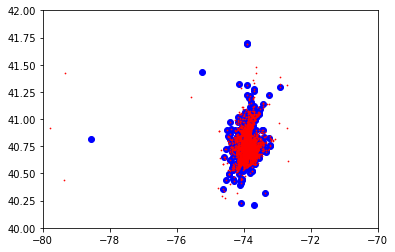

In [ ]:
plt.scatter(x=taxi_rides_df['pickup_longitude'], y=taxi_rides_df['pickup_latitude'], c = 'b')
plt.scatter(x=taxi_rides_df['dropoff_longitude'], y=taxi_rides_df['dropoff_latitude'], c = 'r', s=0.5)

plt.xlim(-80, -70)
plt.ylim(40,42)
plt.show()

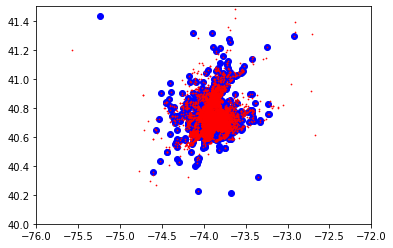

In [ ]:
plt.scatter(x=taxi_rides_df['pickup_longitude'], y=taxi_rides_df['pickup_latitude'], c = 'b')
plt.scatter(x=taxi_rides_df['dropoff_longitude'], y=taxi_rides_df['dropoff_latitude'], c = 'r', s=0.5)

plt.xlim(-76, -72)
plt.ylim(40,41.5)
plt.show()

Now let's see where is middle point:

In [ ]:
taxi_rides_df[['pickup_latitude', 'dropoff_latitude']].mean().mean()

40.7513851447103

In [ ]:
taxi_rides_df[['pickup_longitude', 'dropoff_longitude']].mean().mean()

-73.97339592258902

#### Plotting the middle point

In [ ]:
from IPython.display import IFrame

IFrame(src="https://www.google.com/maps/embed?pb=!1m18!1m12!1m3!1d22013.281535057613!2d-73.98996635841118!3d40.75209762091606!2m3!1f0!2f0!3f0!3m2!1i1024!2i768!4f13.1!3m3!1m2!1s0x0%3A0x0!2zNDDCsDQ1JzA0LjciTiA3M8KwNTgnMjQuMiJX!5e0!3m2!1spt-BR!2sbr!4v1617404985288!5m2!1spt-BR!2sbr", width=300, height=300)

In [ ]:
import pandas as pd

In [ ]:
taxi_rides_output_df = pd.read_csv('/content/drive/MyDrive/DataProductManagerUdacityData/MidtermProject/taxi_rides_output.csv')

In [ ]:
taxi_rides_output_df.columns

Index(['Unnamed: 0', 'id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'duration', 'distance', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'projected_distance_km', 'price', 'distance_to_duration_ratio',
       'duration_to_distance_ratio', 'geometry', 'pickup_datetime_dt'],
      dtype='object')

In [ ]:
taxi_aux_df = taxi_rides_output_df[['id',
                      'pickup_longitude',
                      'pickup_latitude',
                      'dropoff_longitude',
                      'dropoff_latitude',
                      'price',
                      'distance_to_duration_ratio',
                      'duration_to_distance_ratio']]

In [ ]:
taxi_aux_df.head()

,id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,price,distance_to_duration_ratio,duration_to_distance_ratio
0,id3487442,-73.981819,40.768963,-73.981819,40.768963,4.53518,0.0,0.0
1,id1145809,-73.808487,40.687336,-73.808487,40.687336,10.53998,0.0,0.0
2,id3499387,-73.786720,40.647041,-73.786720,40.647041,7.47920,0.0,0.0
3,id0753277,-74.209854,40.816853,-74.209854,40.816853,2.86718,0.0,0.0
4,id2134482,-73.776314,40.645454,-73.776314,40.645454,2.80046,0.0,0.0


In [ ]:
taxi_aux_df.to_excel("/content/drive/MyDrive/DataProductManagerUdacityData/MidtermProject/taxi_rides_lean.xlsx",
             sheet_name='Taxi_Rides')

Exception ignored in: <function ZipFile.__del__ at 0x7fe72789db90>
Traceback (most recent call last):
  File "/usr/lib/python3.7/zipfile.py", line 1809, in __del__
    self.close()
  File "/usr/lib/python3.7/zipfile.py", line 1831, in close
    self._fpclose(fp)
  File "/usr/lib/python3.7/zipfile.py", line 1939, in _fpclose
    fp.close()
OSError: [Errno 107] Transport endpoint is not connected


Done using Tableau...

## Best time of the day to run the pilot service

### What times throughout the day experience relatively higher volumes of ride pick-ups?

In [ ]:
taxi_rides_df.head()

,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,duration,distance,Unnamed: 12,Unnamed: 13,Unnamed: 14,projected_distance_km,price,distance_to_duration_ratio,duration_to_distance_ratio,pickup_datetime_dt
9530,9530,id2361304,1,6/27/16 14:00,6/27/16 14:10,1,-73.921532,40.753223,-73.922714,40.753304,N,586,0.100008,NaN,NaN,NaN,0.100008,7.685253,0.000171,5859.530241,2016-06-27 14:00:00
9531,9531,id2761959,1,1/15/16 15:53,1/15/16 15:54,1,-73.993980,40.720108,-73.993622,40.720966,N,70,0.100109,NaN,NaN,NaN,0.100110,3.381971,0.001430,699.235386,2016-01-15 15:53:00
9533,9533,id2337991,2,3/4/16 7:49,3/4/16 7:52,1,-73.978111,40.764839,-73.976921,40.764809,N,225,0.100293,NaN,NaN,NaN,0.100294,4.674957,0.000446,2243.422286,2016-03-04 07:49:00
9534,9534,id2137446,2,2/12/16 8:39,2/12/16 8:42,1,-73.866577,40.771301,-73.867653,40.770912,N,126,0.100391,NaN,NaN,NaN,0.100391,3.849450,0.000797,1255.094101,2016-02-12 08:39:00
9535,9535,id0245989,1,2/17/16 16:20,2/17/16 16:22,1,-73.977417,40.754635,-73.978470,40.755058,N,149,0.100407,NaN,NaN,NaN,0.100407,4.041295,0.000674,1483.957740,2016-02-17 16:20:00


In [ ]:
pickup_series = pd.to_datetime(taxi_rides_df.pickup_datetime)

In [ ]:
pickup_series.head()

9530   2016-06-27 14:00:00
9531   2016-01-15 15:53:00
9533   2016-03-04 07:49:00
9534   2016-02-12 08:39:00
9535   2016-02-17 16:20:00
Name: pickup_datetime, dtype: datetime64[ns]

In [ ]:
# taxi_rides_df['pickup_datetime_dt'] = pickup_series

In [34]:
 pickup_series = taxi_rides_df['pickup_datetime_dt']

In [35]:
taxi_rides_df['pickup_datetime_dt']

9530       2016-06-27 14:00:00
9531       2016-01-15 15:53:00
9533       2016-03-04 07:49:00
9534       2016-02-12 08:39:00
9535       2016-02-17 16:20:00
                  ...         
1048313    2016-04-27 07:37:00
1048324    2016-03-19 12:29:00
1048327    2016-03-07 18:39:00
1048330    2016-04-11 08:37:00
1048390    2016-01-01 22:57:00
Name: pickup_datetime_dt, Length: 1036502, dtype: object

In [37]:
pickup_series.dt

AttributeError: ignored

In [31]:
pickup_series.dt.hour.value_counts().sort_values(ascending=False)

AttributeError: ignored

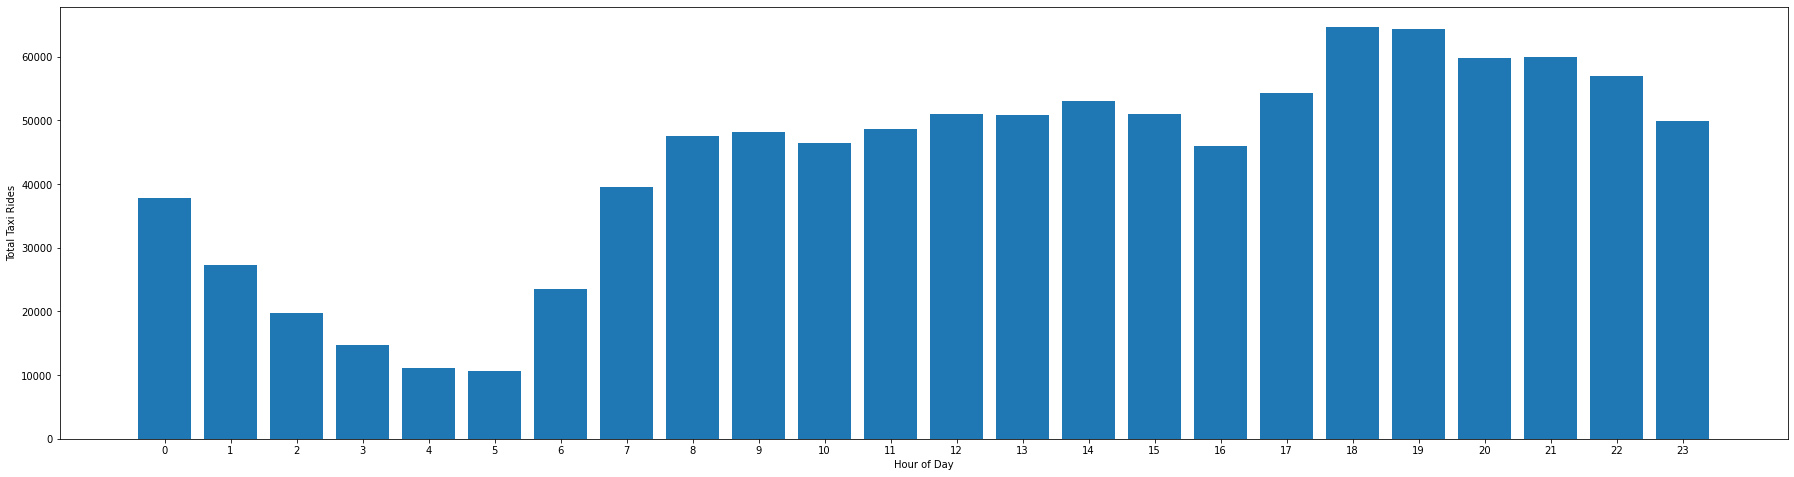

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(24, 6))
ax = fig.add_axes([0,0,1,1])
hours = pickup_series.dt.hour.value_counts().sort_values(ascending=False).index
count = pickup_series.dt.hour.value_counts().sort_values(ascending=False).values
ax.bar(hours,count)
ax.set_xticks(np.arange(len(count)))
plt.ylabel('Total Taxi Rides')
plt.xlabel('Hour of Day')
plt.show()

In [ ]:
array = pickup_series.dt.hour.value_counts().sort_values(ascending=False)

In [ ]:
array[0:4]

18    64616
19    64304
21    59980
20    59783
Name: pickup_datetime, dtype: int64

In [ ]:
(array[0:4].sum()/array.sum()) * 100

23.983269392864514

### What days throughout the week experience relatively higher volumes of ride pick-ups?


In [ ]:
pickup_series.dt.dayofweek

0          0
1          0
2          0
3          2
4          4
          ..
1048463    3
1048464    2
1048465    0
1048466    2
1048467    5
Name: pickup_datetime, Length: 1048468, dtype: int64

0: Monday
...
6: Sunday

In [ ]:
pickup_series.dt.dayofweek.value_counts().sort_values(ascending=False)

4    160720
5    158846
3    157224
2    151052
1    145268
6    140699
0    134659
Name: pickup_datetime, dtype: int64

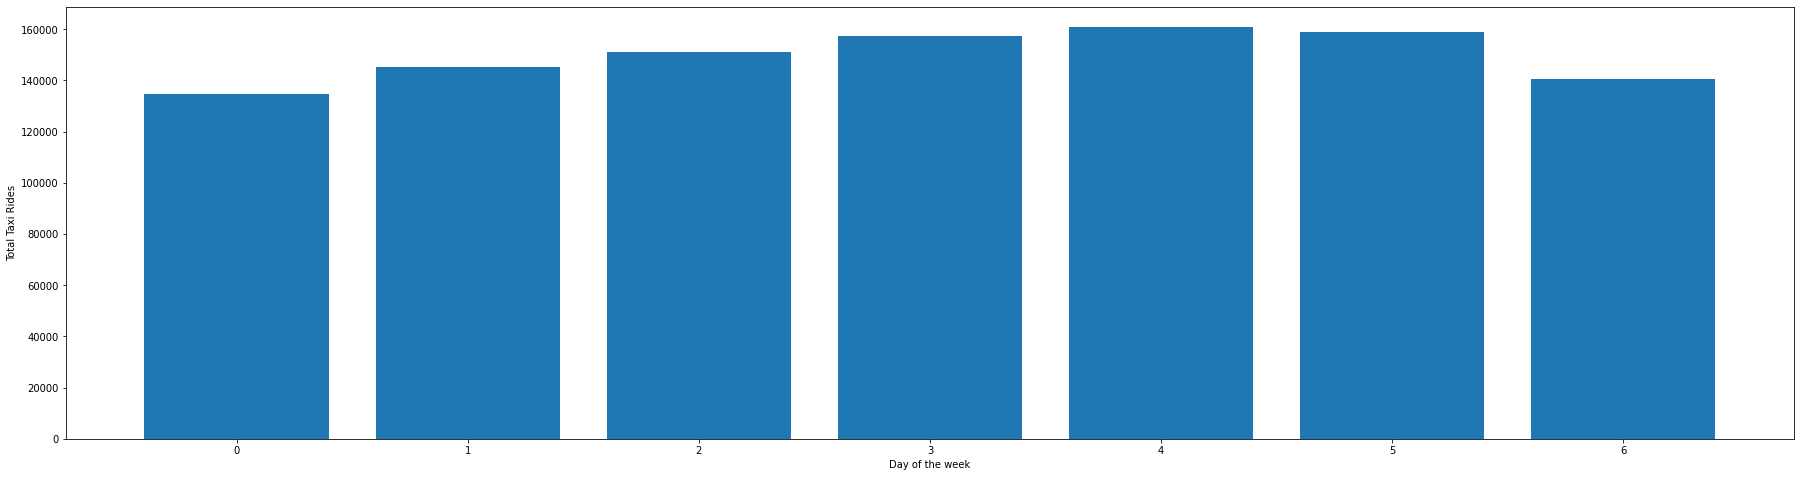

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(24, 6))
ax = fig.add_axes([0,0,1,1])
days = pickup_series.dt.dayofweek.value_counts().index
count = pickup_series.dt.dayofweek.value_counts().values

# days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax.bar(days,count)
ax.set_xticks(np.arange(len(days)))
plt.ylabel('Total Taxi Rides')
plt.xlabel('Day of the week')
plt.show()

In [ ]:
array_day = pickup_series.dt.dayofweek.value_counts().sort_values(ascending=False)

In [ ]:
(array_day[3:5].sum()/array_day.sum()) * 100

28.262188259441395

### Pinpoint any periods throughout the year that experience trend fluctuation or seasonality around ride pick-up volumes.

This will help us in our post-launch analyses to determine if any spikes or dips were influenced by seasonality or through actual feature adoption/regression.

In [ ]:
pickup_series = taxi_rides_df['pickup_datetime_dt'] 

In [ ]:
pickup_series.dt.month.value_counts(sort=False)

1    165087
2    171584
3    184116
4    180923
5    178570
6    168188
Name: pickup_datetime_dt, dtype: int64

In [ ]:
pickup_series.dt.month_name().unique()

array(['February', 'May', 'January', 'March', 'April', 'June'],
      dtype=object)

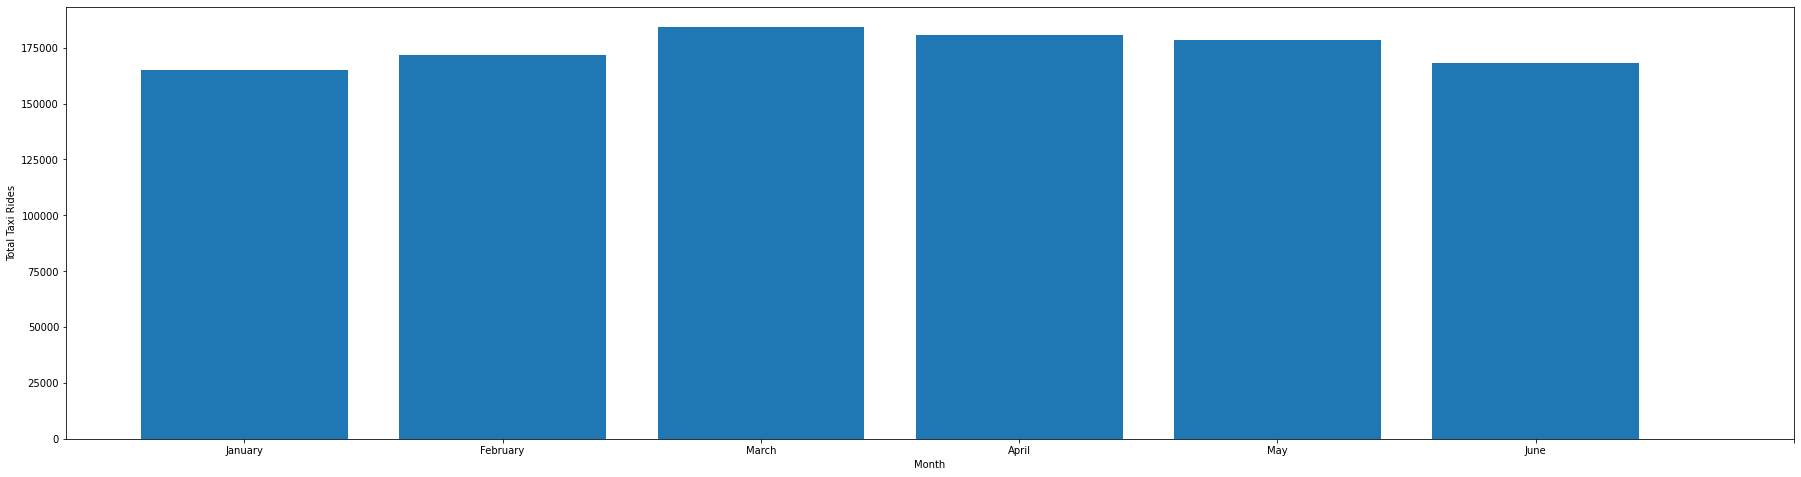

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(24, 6))
ax = fig.add_axes([0,0,1,1])
# months = pickup_series.dt.month.value_counts(sort=False).index
count = pickup_series.dt.month.value_counts(sort=False).values

months = ['January', 'February', 'March', 'April', 'May','June']

ax.bar(months,count)
ax.set_xticks(np.arange(len(days)))
plt.ylabel('Total Taxi Rides')
plt.xlabel('Month')
plt.show()

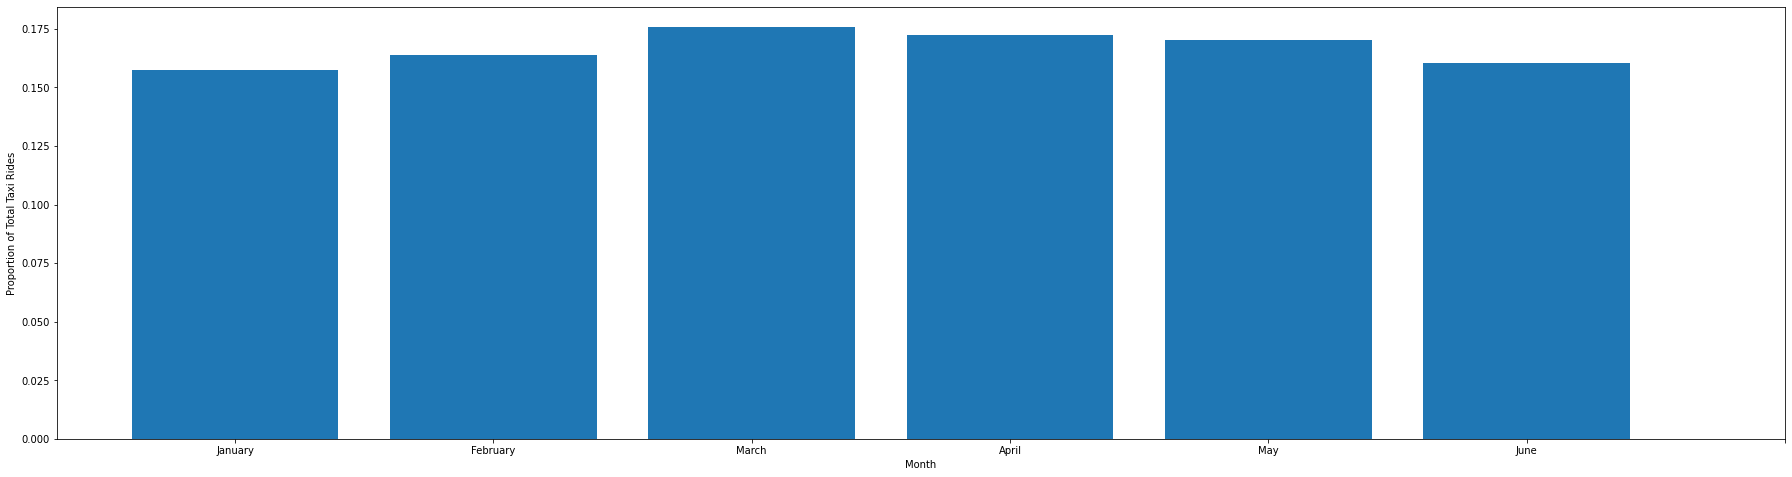

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(24, 6))
ax = fig.add_axes([0,0,1,1])
# months = pickup_series.dt.month.value_counts(sort=False).index
count = (pickup_series.dt.month.value_counts(sort=False).values) / pickup_series.dt.month.value_counts(sort=False).values.sum()

months = ['January', 'February', 'March', 'April', 'May','June']

ax.bar(months,count)
ax.set_xticks(np.arange(len(days)))
plt.ylabel('Proportion of Total Taxi Rides')
plt.xlabel('Month')
plt.show()

In [ ]:
taxi_rides_df.to_csv('/content/drive/MyDrive/DataProductManagerUdacityData/MidtermProject/taxi_rides_output.csv')

## Marketing Efforts Analysis

In [ ]:
import pandas as pd

In [ ]:
ur_df = pd.read_csv('/content/drive/MyDrive/DataProductManagerUdacityData/MidtermProject/user-research.csv')

### Exploring User Reseach Data

In [ ]:
ur_df.head()

,Q1_Email,Q2_Gender,Q3_Age,Q4_Income,Q5_Neighborhood,Q6_Taxis,Q7_Rideshare,Q8_Flying_Taxi,Q9_If_Yes,Q10_If_No
0,emailofnewyorker+369@gmail.com,M,65.0,"$80,000 - $120,000",Hudson Yards,N,Y,Y,22.0,NaN
1,emailofnewyorker+429@gmail.com,F,25.0,"$120,000 - $200,000",Fort George,Y,Y,N,NaN,I think it is more unsafe than taxis
2,emailofnewyorker+159@gmail.com,F,49.0,"$20,001 - $40,000",Theater District,N,Y,Y,6.0,NaN
3,emailofnewyorker+414@gmail.com,M,72.0,"> $200,000",Tribeca,Y,N,N,NaN,Wouldn't trust the person flying it
4,emailofnewyorker+375@gmail.com,F,42.0,"$80,000 - $120,000",Yorkville,N,N,Y,24.0,NaN


In [ ]:
ur_df.shape

(500, 10)

In [ ]:
ur_df[ur_df.Q8_Flying_Taxi == 'Y'].shape

(400, 10)

### Is there an inclination of better Flyber adoption based on gender, age, income level, or neighborhood of residence?

#### Gender

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
genders = ur_df[ur_df.Q8_Flying_Taxi == 'Y'].Q2_Gender.value_counts().index
count = ur_df[ur_df.Q8_Flying_Taxi == 'Y'].Q2_Gender.value_counts().values

print(genders)
print(count)

Index(['F', 'M'], dtype='object')
[243 157]


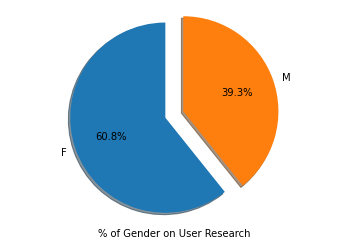

In [ ]:
labels = genders
sizes = count
explode = ([0, 0.2])

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.xlabel('% of Gender on User Research')
plt.show()

In [ ]:
total_female = len(ur_df[ur_df.Q2_Gender == 'F'])
total_female

307

In [ ]:
total_female_accepted = len(ur_df[(ur_df.Q2_Gender == 'F')&(ur_df.Q8_Flying_Taxi == 'Y')])
total_female_accepted

243

In [ ]:
total_male = len(ur_df[ur_df.Q2_Gender == 'M'])
total_male

192

In [ ]:
total_male_accepted = len(ur_df[(ur_df.Q2_Gender == 'M')&(ur_df.Q8_Flying_Taxi == 'Y')])
total_male_accepted

157

In [ ]:
perc_female_acceptance = total_female_accepted/total_female
perc_female_acceptance

0.7915309446254072

In [ ]:
perc_male_acceptance = total_male_accepted/total_male
perc_male_acceptance

0.8177083333333334

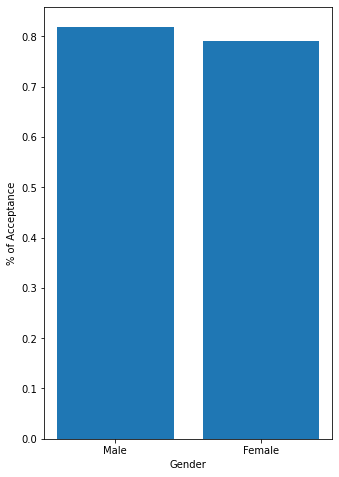

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(4, 6))
ax = fig.add_axes([0,0,1,1])

ax.bar(['Male', 'Female'],[perc_male_acceptance, perc_female_acceptance])
ax.set_xticks(np.arange(2))
plt.ylabel('% of Acceptance')
plt.xlabel('Gender')
plt.show()

#### Age

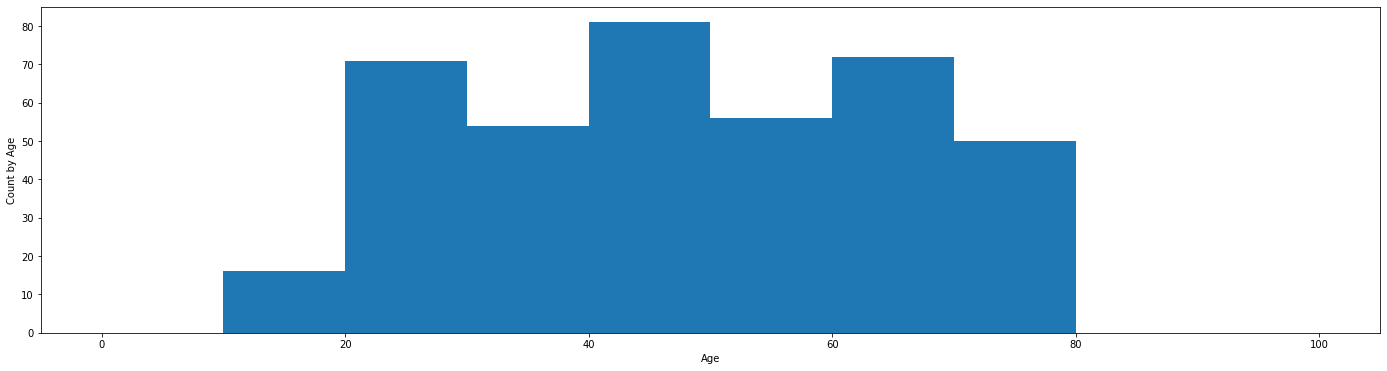

In [ ]:
plt.figure(figsize=(24,6))
counts, bins, bars = plt.hist(ur_df[ur_df.Q8_Flying_Taxi == 'Y'].Q3_Age, bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.xlabel('Age')
plt.ylabel('Count by Age')
plt.show()

In [ ]:
print(bins)
print(counts)
print(counts[2:7:2].sum()/counts.sum())
print(counts[2:7].sum()/counts.sum())

[  0  10  20  30  40  50  60  70  80  90 100]
[ 0. 16. 71. 54. 81. 56. 72. 50.  0.  0.]
0.56
0.835


In [ ]:
age_limits = np.arange(18,81,2)
age_limits

array([18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50,
       52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80])

In [ ]:
indexes = np.arange(31)
indexes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [ ]:
labels = []
perc_accept = []

for index in indexes:
  labels.append(str(age_limits[index]) + ' - ' + str(age_limits[index+1]))
  # print(labels[index])
  age_segment_mask = ((ur_df.Q3_Age > age_limits[index])&(ur_df.Q3_Age <= age_limits[index+1]))
  age_segment_mask_acc = ((ur_df.Q3_Age > age_limits[index])&(ur_df.Q3_Age <= age_limits[index+1])&(ur_df.Q8_Flying_Taxi == 'Y'))
  numerador = len(ur_df[age_segment_mask_acc])
  denominador = len(ur_df[age_segment_mask])
  if denominador != 0:
    perc = numerador/denominador
  else:
      perc = 0
  perc_accept.append(perc)

perc_accept

[0.6666666666666666,
 0.7272727272727273,
 0.8125,
 0.8333333333333334,
 0.84,
 0.8333333333333334,
 0.9375,
 0.5555555555555556,
 0.75,
 0.5555555555555556,
 0.9333333333333333,
 0.8333333333333334,
 0.8571428571428571,
 0.8333333333333334,
 0.8076923076923077,
 0.8823529411764706,
 0.631578947368421,
 0.7777777777777778,
 0.75,
 0.8125,
 1.0,
 0.8888888888888888,
 0.8421052631578947,
 0.8666666666666667,
 0.72,
 0.9166666666666666,
 0.7,
 0.875,
 0.7647058823529411,
 0,
 0]

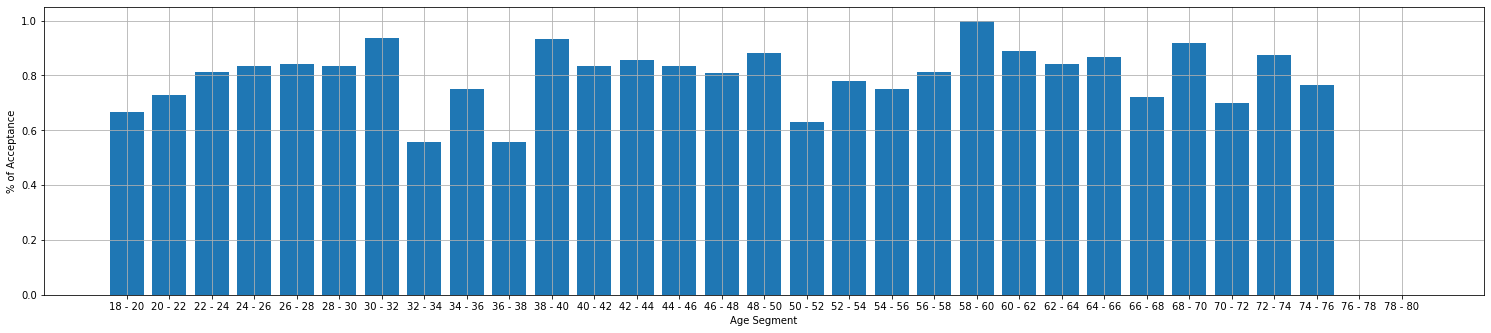

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(20, 4))
ax = fig.add_axes([0,0,1,1])

ax.bar(labels,perc_accept)
ax.set_xticks(np.arange(len(labels)))

plt.ylabel('% of Acceptance')
plt.xlabel('Age Segment')

plt.grid(b=True, which='major', axis='both')

plt.show()

#### Income

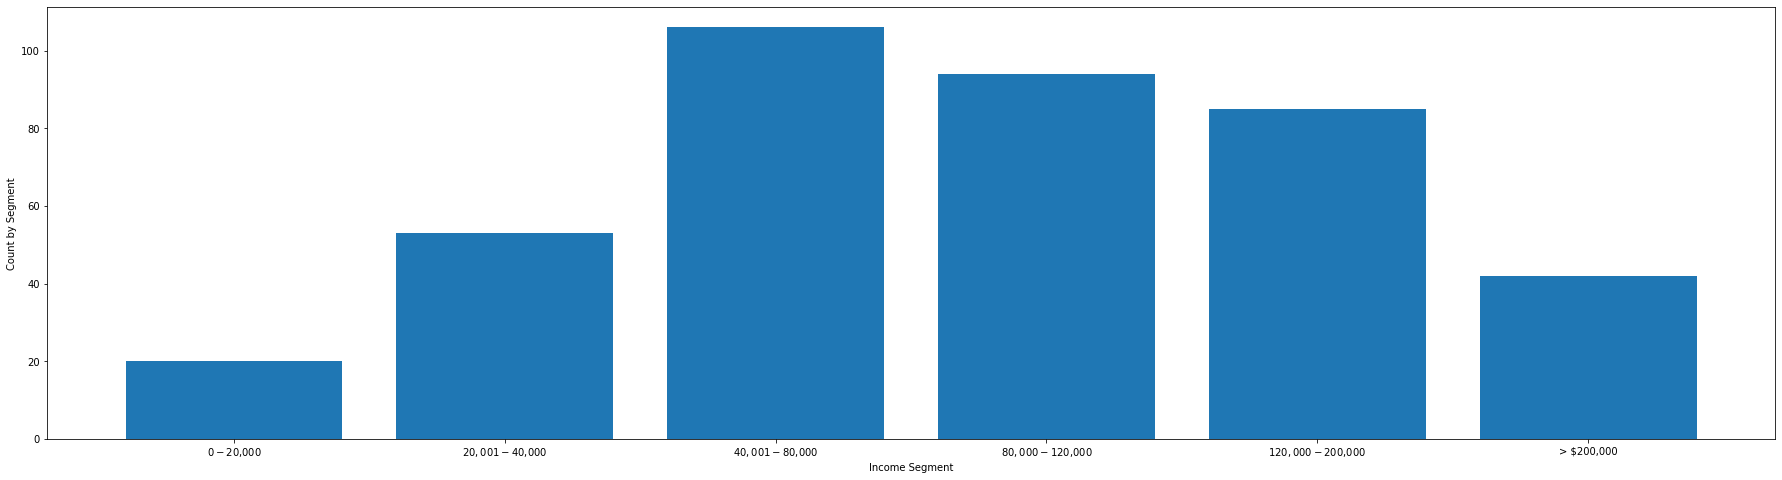

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(24, 6))
ax = fig.add_axes([0,0,1,1])

income_segment_ordered = ['$0 - $20,000', '$20,001 - $40,000', '$40,001 - $80,000', '$80,000 - $120,000', '$120,000 - $200,000', '> $200,000']

income_segment = ur_df[ur_df.Q8_Flying_Taxi == 'Y'].Q4_Income.value_counts()[income_segment_ordered].index
count = ur_df[ur_df.Q8_Flying_Taxi == 'Y'].Q4_Income.value_counts()[income_segment_ordered].values

ax.bar(income_segment,count)
ax.set_xticks(np.arange(len(income_segment)))
plt.ylabel('Count by Segment')
plt.xlabel('Income Segment')
plt.show()

In [ ]:
ur_df[ur_df.Q8_Flying_Taxi == 'Y'].Q4_Income.value_counts()[income_segment_ordered]

$0 - $20,000            20
$20,001 - $40,000       53
$40,001 - $80,000      106
$80,000 - $120,000      94
$120,000 - $200,000     85
> $200,000              42
Name: Q4_Income, dtype: int64

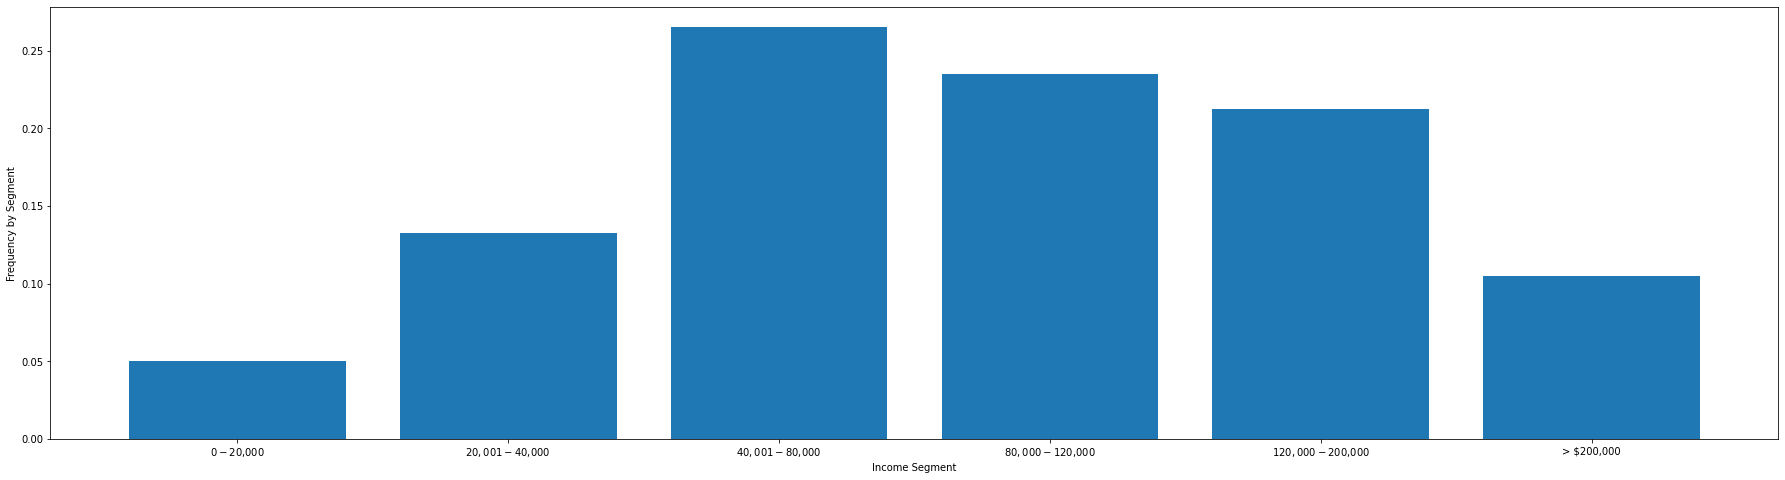

In [ ]:
fig = plt.figure(figsize=(24, 6))
ax = fig.add_axes([0,0,1,1])

income_segment_ordered = ['$0 - $20,000', '$20,001 - $40,000', '$40,001 - $80,000', '$80,000 - $120,000', '$120,000 - $200,000', '> $200,000']

income_segment = ur_df[ur_df.Q8_Flying_Taxi == 'Y'].Q4_Income.value_counts(normalize=True)[income_segment_ordered].index
count = ur_df[ur_df.Q8_Flying_Taxi == 'Y'].Q4_Income.value_counts(normalize=True)[income_segment_ordered].values

ax.bar(income_segment,count)
ax.set_xticks(np.arange(len(income_segment)))
plt.ylabel('Frequency by Segment')
plt.xlabel('Income Segment')
plt.show()

In [ ]:
ur_df[ur_df.Q8_Flying_Taxi == 'Y'].Q4_Income.value_counts(normalize=True)[income_segment_ordered]

$0 - $20,000           0.0500
$20,001 - $40,000      0.1325
$40,001 - $80,000      0.2650
$80,000 - $120,000     0.2350
$120,000 - $200,000    0.2125
> $200,000             0.1050
Name: Q4_Income, dtype: float64

In [ ]:
count[2:4].sum()

0.5

In [ ]:
income_segment

Index(['$0 - $20,000', '$20,001 - $40,000', '$40,001 - $80,000',
       '$80,000 - $120,000', '$120,000 - $200,000', '> $200,000'],
      dtype='object')

In [ ]:
income_segment_ordered = ['$0 - $20,000', '$20,001 - $40,000', '$40,001 - $80,000', '$80,000 - $120,000', '$120,000 - $200,000', '> $200,000']
perc_accept = []

for segment in income_segment_ordered:
  segment_mask = (ur_df.Q4_Income == segment)
  segment_mask_acc = ((ur_df.Q4_Income == segment)&(ur_df.Q8_Flying_Taxi == 'Y'))
  numerador = len(ur_df[segment_mask_acc])
  denominador = len(ur_df[segment_mask])
  if denominador != 0:
    perc = numerador/denominador
  else:
      perc = 0
  perc_accept.append(perc)

perc_accept

[0.8,
 0.803030303030303,
 0.7910447761194029,
 0.7966101694915254,
 0.8585858585858586,
 0.7368421052631579]

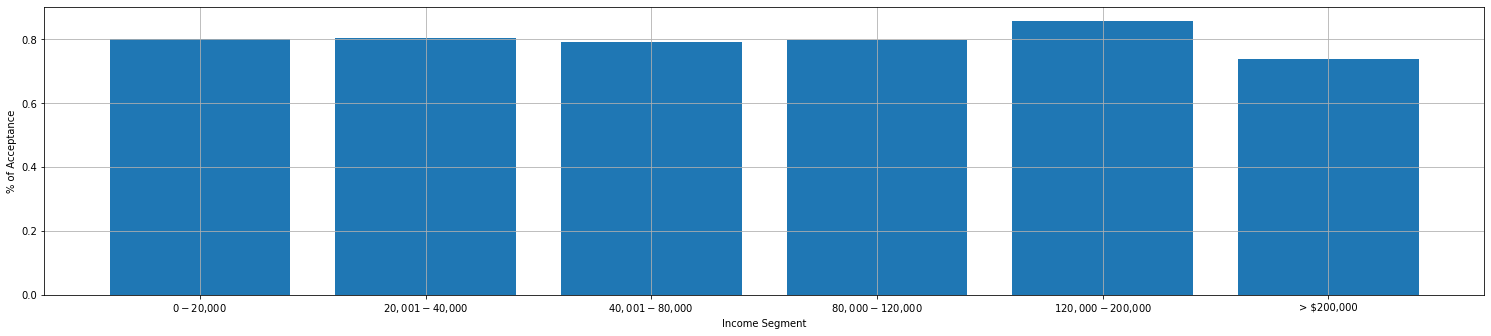

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(20, 4))
ax = fig.add_axes([0,0,1,1])

ax.bar(income_segment_ordered,perc_accept)
ax.set_xticks(np.arange(len(income_segment_ordered)))

plt.ylabel('% of Acceptance')
plt.xlabel('Income Segment')

plt.grid(b=True, which='major', axis='both')

plt.show()

#### Neighborhood

In [ ]:
len(ur_df[(ur_df.Q8_Flying_Taxi == 'Y') & (ur_df.Q6_Taxis == 'Y')].Q5_Neighborhood.unique())

69

In [ ]:
distribution_count = ur_df[ur_df.Q8_Flying_Taxi == 'Y'].Q5_Neighborhood.value_counts()

print(distribution_count[distribution_count.values > 8])


Midtown               15
Battery Park City     14
Financial District    12
Tribeca               11
Tudor City            11
Columbus Circle       10
Turtle Bay             9
Little Brazil          9
Midtown West           9
Hudson Yards           9
Rockefeller Center     9
Hell's Kitchen         9
Name: Q5_Neighborhood, dtype: int64


In [ ]:
distribution_freq = ur_df[ur_df.Q8_Flying_Taxi == 'Y'].Q5_Neighborhood.value_counts(normalize=True) * 100

print(distribution_freq)

print(distribution_freq[0:5].sum())

Midtown               3.75
Battery Park City     3.50
Financial District    3.00
Tribeca               2.75
Tudor City            2.75
                      ... 
Downtown Manhattan    0.75
Hamilton Heights      0.75
Lower East Side       0.50
West Harlem           0.25
Inwood                0.25
Name: Q5_Neighborhood, Length: 69, dtype: float64
15.75


### What is the distribution of potential price per mile based on gender, age, income level, and neighborhood of residence?

In [ ]:
ur_df.Q9_If_Yes.describe()

count    400.000000
mean      23.180000
std        9.278082
min        5.000000
25%       16.750000
50%       23.000000
75%       29.000000
max       46.000000
Name: Q9_If_Yes, dtype: float64

#### Gender 

In [ ]:
mean_M = ur_df[ur_df.Q2_Gender == 'M'].Q9_If_Yes.mean(skipna=True)
mean_M

23.012738853503183

In [ ]:
ur_df[ur_df.Q2_Gender == 'M'].Q9_If_Yes.describe()

count    157.000000
mean      23.012739
std        9.146239
min        7.000000
25%       17.000000
50%       22.000000
75%       28.000000
max       44.000000
Name: Q9_If_Yes, dtype: float64

In [ ]:
mean_F = ur_df[ur_df.Q2_Gender == 'F'].Q9_If_Yes.mean(skipna=True)
mean_F

23.2880658436214

In [ ]:
ur_df[ur_df.Q2_Gender == 'F'].Q9_If_Yes.describe()

count    243.000000
mean      23.288066
std        9.379474
min        5.000000
25%       16.000000
50%       23.000000
75%       29.000000
max       46.000000
Name: Q9_If_Yes, dtype: float64

In [ ]:
((mean_F/mean_M) - 1)*100

1.1964112219363443

#### Age

In [ ]:
ages_segments = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for age in ages_segments:
  print('Between:', age, 'and', age + 10)
  print(ur_df[(ur_df.Q3_Age > age) & (ur_df.Q3_Age <= age + 10)].Q9_If_Yes.mean(skipna=True))

Between: 0 and 10
nan
Between: 10 and 20
26.75
Between: 20 and 30
23.3
Between: 30 and 40
21.35593220338983
Between: 40 and 50
23.139240506329113
Between: 50 and 60
20.649122807017545
Between: 60 and 70
25.972972972972972
Between: 70 and 80
22.414634146341463
Between: 80 and 90
nan
Between: 90 and 100
nan
Between: 100 and 110
nan


#### Income

In [ ]:
income_segment_ordered = ['$0 - $20,000', '$20,001 - $40,000', '$40,001 - $80,000', '$80,000 - $120,000', '$120,000 - $200,000', '> $200,000']
mean_price_list = []

for segment in income_segment_ordered:
  print(segment)
  mean_price = ur_df[ur_df.Q4_Income == segment].Q9_If_Yes.mean(skipna=True)
  mean_price_list.append(mean_price)
  print(mean_price)

$0 - $20,000
11.7
$20,001 - $40,000
15.433962264150944
$40,001 - $80,000
18.330188679245282
$80,000 - $120,000
22.127659574468087
$120,000 - $200,000
31.04705882352941
> $200,000
37.095238095238095


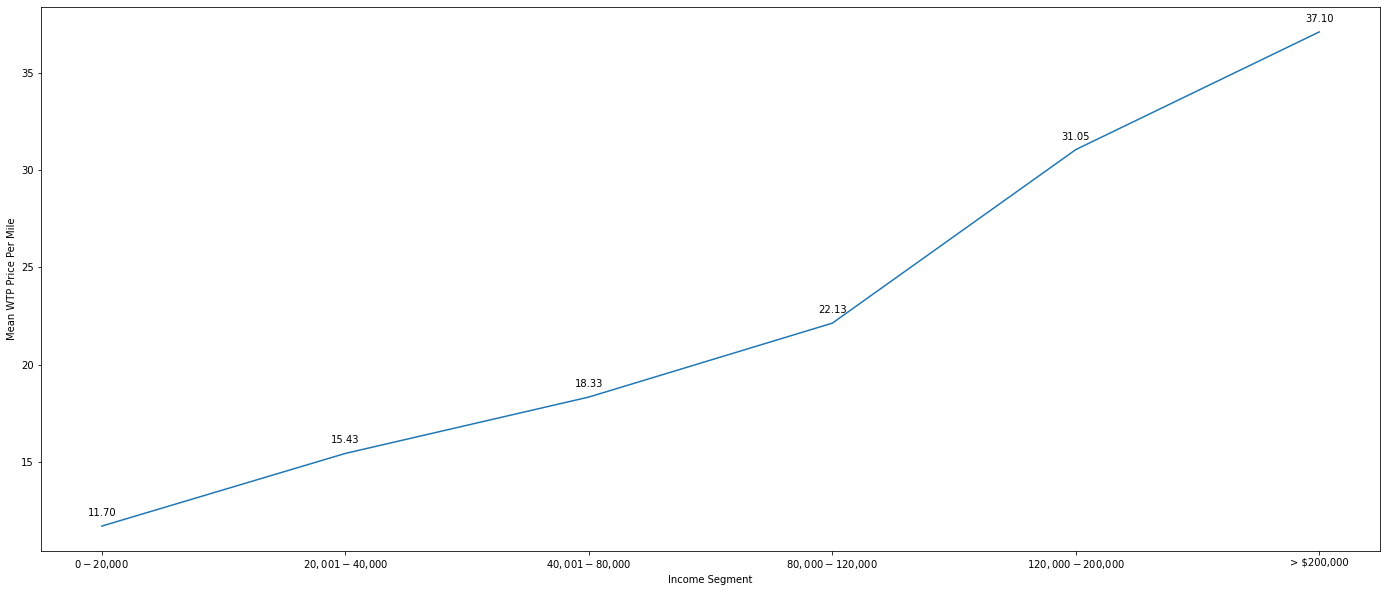

In [ ]:
fig = plt.figure(figsize=(24, 10))

xs = income_segment_ordered
ys = mean_price_list

# zip joins x and y coordinates in pairs
for x,y in zip(xs,ys):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.plot(xs, ys)

plt.ylabel('Mean WTP Price Per Mile')
plt.xlabel('Income Segment')

plt.show()

#### Neighborhood

In [ ]:
neighborhood_list = ur_df.Q5_Neighborhood.unique()
mean_price_list = []

for nb in neighborhood_list:
  mean_price = ur_df[ur_df.Q5_Neighborhood == nb].Q9_If_Yes.mean(skipna=True)
  mean_price_list.append(mean_price)

In [ ]:
nb = pd.Series(neighborhood_list, name='Neighborhood')

nb

0                          Hudson Yards
1                           Fort George
2                      Theater District
3                               Tribeca
4                             Yorkville
                    ...                
64                       Hudson Heights
65    Le Petit Senegal (Little Senegal)
66                                 SoHo
67                          Two Bridges
68                         West Village
Name: Neighborhood, Length: 69, dtype: object

In [ ]:
price = pd.Series(mean_price_list, name='Avg_Price')

price

0     19.666667
1     25.000000
2     22.285714
3     29.363636
4     19.750000
        ...    
64    19.833333
65    23.800000
66    24.200000
67    19.000000
68    27.333333
Name: Avg_Price, Length: 69, dtype: float64

In [ ]:
aux_df = pd.concat([nb, price], axis=1)

aux_df.sort_values(by='Avg_Price', ascending=False)[0:10]

,Neighborhood,Avg_Price
34,Inwood,34.000000
23,Financial District,32.833333
33,Bowery,32.800000
52,Battery Park City,32.714286
26,Columbus Circle,30.100000
3,Tribeca,29.363636
21,Lower East Side,28.000000
68,West Village,27.333333
35,Downtown Manhattan,27.000000
27,Diamond District,26.285714


### What is the different personas/segments of negative sentiment towards not using a flying taxi car service?

In [ ]:
ur_df[ur_df.Q8_Flying_Taxi == 'N'].Q4_Income.describe()

In [ ]:
ur_df[ur_df.Q8_Flying_Taxi == 'N'].Q3_Age.describe()

count    99.000000
mean     45.989899
std      17.656296
min      18.000000
25%      33.000000
50%      46.000000
75%      62.500000
max      76.000000
Name: Q3_Age, dtype: float64

In [ ]:
ur_df.columns

Index(['Q1_Email', 'Q2_Gender', 'Q3_Age', 'Q4_Income', 'Q5_Neighborhood',
       'Q6_Taxis', 'Q7_Rideshare', 'Q8_Flying_Taxi', 'Q9_If_Yes', 'Q10_If_No'],
      dtype='object')

In [ ]:
ur_df[ur_df.Q8_Flying_Taxi == 'N'].Q2_Gender.describe()

count     99
unique     2
top        F
freq      64
Name: Q2_Gender, dtype: object

In [ ]:
ur_df[ur_df.Q8_Flying_Taxi == 'N'].Q5_Neighborhood.describe()

count              99
unique             52
top       West Harlem
freq                5
Name: Q5_Neighborhood, dtype: object

#### Most Mentioned Words in Negative Answers

In [ ]:
list_aux = ur_df[ur_df.Q8_Flying_Taxi == 'N'].Q10_If_No.to_list()

In [ ]:
list_aux = ' '.join(list_aux)

In [ ]:
list_aux = list_aux.split()

list_aux

['I',
 'think',
 'it',
 'is',
 'more',
 'unsafe',
 'than',
 'taxis',
 "Wouldn't",
 'trust',
 'the',
 'person',
 'flying',
 'it',
 'It',
 'would',
 'be',
 'too',
 'expensive',
 'Not',
 'worth',
 'the',
 'extra',
 'money',
 'It',
 'would',
 'be',
 'too',
 'expensive',
 "It's",
 'unsafe',
 "It's",
 'dangerous',
 "Wouldn't",
 'trust',
 'the',
 'person',
 'flying',
 'it',
 'Not',
 'worth',
 'the',
 'extra',
 'money',
 'I',
 'think',
 'it',
 'is',
 'more',
 'unsafe',
 'than',
 'taxis',
 'Not',
 'worth',
 'the',
 'extra',
 'money',
 "Wouldn't",
 'trust',
 'the',
 'person',
 'flying',
 'it',
 'My',
 'commute',
 'is',
 'fairly',
 'efficient',
 'I',
 'think',
 "it's",
 'more',
 'dangerous',
 'I',
 'think',
 'it',
 'is',
 'more',
 'unsafe',
 'than',
 'taxis',
 'Not',
 'worth',
 'the',
 'extra',
 'money',
 'I',
 'think',
 'it',
 'is',
 'more',
 'unsafe',
 'than',
 'taxis',
 "Wouldn't",
 'trust',
 'the',
 'person',
 'flying',
 'it',
 'I',
 'think',
 'it',
 'is',
 'more',
 'unsafe',
 'than',
 'taxis

In [ ]:
from collections import Counter

In [ ]:
counter_aux = dict(Counter(list_aux))

counter_aux

{'I': 28,
 'It': 15,
 "It's": 14,
 'My': 9,
 'Not': 13,
 'The': 5,
 "Wouldn't": 15,
 'already': 6,
 'as': 10,
 'be': 15,
 'commute': 9,
 'crowded': 5,
 'dangerous': 11,
 'efficient': 3,
 'expensive': 15,
 'extra': 13,
 'fairly': 3,
 'flying': 15,
 'get': 5,
 'is': 32,
 'it': 38,
 "it's": 5,
 'just': 5,
 'money': 13,
 'more': 28,
 'person': 15,
 'skies': 5,
 'straightforward': 6,
 'streets': 5,
 'taxis': 23,
 'than': 23,
 'the': 33,
 'think': 28,
 'too': 15,
 'trust': 15,
 'unsafe': 31,
 'worth': 13,
 'would': 20}

{'I': 28,
 'It': 15,
 "It's": 14,
 'My': 9,
 'Not': 13,
 'The': 5,
 "Wouldn't": 15,
 'already': 6,
 'as': 10,
 'be': 15,
 'commute': 9,
 'crowded': 5,
 'dangerous': 11,
 'efficient': 3,
 'expensive': 15,
 'extra': 13,
 'fairly': 3,
 'flying': 15,
 'get': 5,
 'is': 32,
 'it': 38,
 "it's": 5,
 'just': 5,
 'money': 13,
 'more': 28,
 'person': 15,
 'skies': 5,
 'straightforward': 6,
 'streets': 5,
 'taxis': 23,
 'than': 23,
 'the': 33,
 'think': 28,
 'too': 15,
 'trust': 15,
 'unsafe': 31,
 'worth': 13,
 'would': 20}